In [1]:
import pandas as pd
from collections import Counter
import numpy as np
import math
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
%matplotlib inline
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/justinchen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('/Users/justinchen/Desktop/AARD Datasets/mental_health_subreddits_dataset.csv')

In [3]:
df.dropna(axis = 0, how = 'any')

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
0,963,covid19_support,1635203992,This. Plus remember the poster in here a few w...,-0.6652
1,967,anxiety,1635203988,Currently 8 and a half months pregnant and als...,-0.8555
2,1142,anxiety,1635203613,Few people had COVID in my building and refuse...,-0.2960
3,1403,covid19_support,1635202948,My friend will be so relieved she didn't actua...,0.7626
4,1616,depression,1635202459,This hits close to home. \n\nHe sounds similar...,-0.4006
...,...,...,...,...,...
45879,17777050,anxiety,1581473713,"It is quite interesting, in terms of somewhat ...",-0.9256
45880,17777094,anxiety,1581466598,Stay focused on what the experts are saying an...,0.7430
45881,17777113,anxiety,1581463547,"No new COVID-19 cases in B.C., 4 confirmed pat...",-0.1531
45882,17777197,mentalhealth,1581454025,"Hi mate, as someone with GAD I can relate to y...",0.5332


In [4]:
sample = df.sample(45000)
sample.head()

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
42853,16853281,anxiety,1586348385,This guy's site has been a source of comfort f...,0.1154
45252,17595778,depression,1584180295,through the crisis I had just no time to think...,-0.6232
35572,14894892,anxiety,1593268333,Your post has **not** been removed or flagged....,0.7635
12642,7060082,anxiety,1616048148,Do you have health insurance? Since COVID man...,0.9070
20307,10081549,covid19_support,1607321650,It's hard being a new mum. When I had my litt...,0.9756


In [5]:
count = Counter()
for index, row in sample.iterrows():
    if row['subreddit.name'] == 'anxiety':
        count['anxiety'] += 1
    if row['subreddit.name'] == 'depression':
        count['depression'] += 1
    if row['subreddit.name'] == 'suicidewatch':
        count['SuicideWatch'] += 1
    if row['subreddit.name'] == 'mentalhealth':
        count['mentalhealth'] += 1
    if row['subreddit.name'] == 'covid19_support':
        count['COVID19_support'] += 1
count

Counter({'anxiety': 16370,
         'depression': 5763,
         'COVID19_support': 15655,
         'SuicideWatch': 3971,
         'mentalhealth': 3241})

## Preprocessing 

In [6]:
import re #regex library used for substituting words
import demoji #https://github.com/bsolomon1124/demoji

In [7]:
def pre_cleaning(text):
    line=re.sub(r"\Bu/\w+", "USERNAME", text) #replace username with USERNAME
    line = demoji.replace(line, repl=' ')
    return line

In [8]:
#removing stopwords and urls, stemming, making lowercase 
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def cleaning(text, stem=False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

In [9]:
def post_cleaning(text):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ',text)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 
    
    #remove digits
    processed_feature = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", processed_feature)

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    return processed_feature

In [10]:
#above functions combined
def preprocessing(text):
    line = pre_cleaning(text)
    line = cleaning(line)
    line = post_cleaning (line)
    return line

In [11]:
sample.body = sample.body.apply(lambda x: preprocessing(x))

In [12]:
sample.head()

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
42853,16853281,anxiety,1586348385,guy site source comfort people late gone prett...,0.1154
45252,17595778,depression,1584180295,crisis time think depression feelings much eve...,-0.6232
35572,14894892,anxiety,1593268333,post removed flagged see mentioned covid pleas...,0.7635
12642,7060082,anxiety,1616048148,health insurance since covid many offering fre...,0.9070
20307,10081549,covid19_support,1607321650,hard new mum little one would check cot contin...,0.9756


In [13]:
for sentiment in sample['sentiment']:
    if sentiment > 0:
        sample['sentiment'].replace({sentiment : 'positive'}, inplace=True)
    if sentiment < 0:
        sample['sentiment'].replace({sentiment : 'negative'}, inplace=True)
    else:
        sample['sentiment'].replace({sentiment : 'neutral'}, inplace=True)

Text(0.5, 1.0, 'Sentiment Data Distribution')

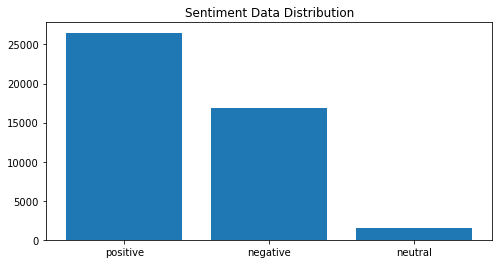

In [14]:
#Graphing
val_count = sample.sentiment.value_counts()
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [17]:
sample.head()

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
20244,10051420,anxiety,1607392837,covid cases declining despite increased testing,negative
12358,6942378,depression,1616438248,know pretty much exactly mean lost best friend...,negative
4996,3134343,anxiety,1628307597,felt bad also already covid super overly prote...,positive
9709,5670174,covid19_support,1620252740,past mid night live couple weeks slept soundly...,negative
33155,14211314,suicidewatch,1595230189,yes therapy since years old go group therapy f...,positive


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
 # Splits Dataset into Training and Testing set
train_size = 0.8
train_data, test_data = train_test_split(sample, test_size=1-train_size, random_state=42, shuffle=True)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 36000
Test Data size 9000


## Vectorizing

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer(max_features=14000,
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectorizer.fit(train_data.body.to_list())
x_train = vectorizer.transform(train_data.body.to_list())
x_test = vectorizer.transform(test_data.body.to_list())

In [19]:
print("x_train Shape:",x_train.shape)
print("x_test Shape:",x_test.shape)

x_train Shape: (36000, 13250)
x_test Shape: (9000, 13250)


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (36000, 1)
y_test shape: (9000, 1)


## Linear SVM Model

In [23]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

In [24]:
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(x_train, y_train.ravel())
t1 = time.time()
prediction_linear = classifier_linear.predict(x_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

labels = [0.0, 1.0, 2.0]
target_names = ['negative', 'neutral', 'positive']

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(y_test, prediction_linear, labels = labels, target_names = target_names, output_dict=True)

print("Accuracy:", metrics.accuracy_score(y_test, prediction_linear))

print('positive: ', report['positive'])
print('negative: ', report['negative'])
print('neutral: ', report['neutral'])

Training time: 11992.931945s; Prediction time: 1825.581834s
Accuracy: 0.8112222222222222
positive:  {'precision': 0.8324521422060164, 'recall': 0.8792605430387059, 'f1-score': 0.855216332646563, 'support': 5193}
negative:  {'precision': 0.7796963381958917, 'recall': 0.7608948285880303, 'f1-score': 0.7701808557565064, 'support': 3442}
neutral:  {'precision': 0.7435897435897436, 'recall': 0.3178082191780822, 'f1-score': 0.4452975047984645, 'support': 365}


In [27]:
comment = vectorizer.transform()

In [28]:
classifier_linear.predict(comment)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Anxiety SVM

In [11]:
drop_list = []
for a in range(45884):
    if df.at[a, 'subreddit.name'] != 'anxiety':
        drop_list.append(a)

In [12]:
anxiety_sample = df.drop(drop_list, axis = 0)
anxiety_sample

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
1,967,anxiety,1635203988,currently half months pregnant also covid suff...,-0.8555
2,1142,anxiety,1635203613,people covid building refused get vaccinated,-0.2960
7,5439,anxiety,1635193321,surrounded anti covid vax people mine also sec...,-0.9364
8,5753,anxiety,1635192653,wow found sub reddit today really ever reddit ...,-0.9878
12,7513,anxiety,1635188671,fine study results shown amp plus moderna comb...,0.9834
...,...,...,...,...,...
45878,17777040,anxiety,1581474617,interesting indeed also interesting much menta...,0.9428
45879,17777050,anxiety,1581473713,quite interesting terms somewhat putting thing...,-0.9256
45880,17777094,anxiety,1581466598,stay focused experts saying avoid sensationali...,0.7430
45881,17777113,anxiety,1581463547,new covid cases c confirmed patients well prov...,-0.1531


In [13]:
for sentiment in anxiety_sample['sentiment']:
    anxiety_sample['sentiment'].replace({sentiment : 'anxiety'}, inplace=True)

In [14]:
control_list = []
for a in range(45884):
    if df.at[a, 'subreddit.name'] == 'anxiety':
        control_list.append(a)

In [19]:
anxiety_control = df.drop(control_list, axis = 0)
anxiety_control = anxiety_control.sample(16689)
anxiety_control

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
21690,10588883,suicidewatch,1605974727,huh see okay feel way good someone life make s...,0.9794
6317,3925243,covid19_support,1626527115,unlikely impossible terms long covid virus get...,-0.7684
18203,9307965,covid19_support,1609360743,whole family gone since covid far planning,0.0000
9557,5599591,covid19_support,1620458129,went worrying high risk parents kept checking ...,0.9628
22967,11049139,depression,1604808188,generally tried connecting people classes get ...,-0.7208
...,...,...,...,...,...
2848,1897626,covid19_support,1630639480,yep thing happened sis fully vaccinated caught...,0.2960
29670,13242589,covid19_support,1598049117,know feel mourning life covid,-0.4404
2756,1826372,covid19_support,1630779425,hate agree covidiot husband anything test woul...,0.9636
12464,6981685,suicidewatch,1616304975,yes diagnosed adhd recently able get treated d...,-0.8969


In [20]:
for sentiment in anxiety_control['sentiment']:
    anxiety_control['sentiment'].replace({sentiment : 'control'}, inplace=True)

In [17]:
anxiety_dataset = pd.concat([anxiety_sample, anxiety_control])
anxiety_dataset

,Unnamed: 0,subreddit.name,created_utc,body,sentiment
1,967,anxiety,1635203988,currently half months pregnant also covid suff...,anxiety
2,1142,anxiety,1635203613,people covid building refused get vaccinated,anxiety
7,5439,anxiety,1635193321,surrounded anti covid vax people mine also sec...,anxiety
8,5753,anxiety,1635192653,wow found sub reddit today really ever reddit ...,anxiety
12,7513,anxiety,1635188671,fine study results shown amp plus moderna comb...,anxiety
...,...,...,...,...,...
5510,3413526,covid19_support,1627753110,still possibility catch covid less severe prob...,control
42478,16725260,depression,1586756648,jesus mean may cake help attracted compulsive ...,control
24010,11466594,covid19_support,1603645200,also wisconsin sympathize level anxiety talkin...,control
26990,12488733,depression,1600548422,think manage never home alone covid always som...,control


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
 # Splits Dataset into Training and Testing set
train_size = 0.8
train_data, test_data = train_test_split(anxiety_dataset, test_size=1-train_size, random_state=42, shuffle=True)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 26702
Test Data size 6676


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer(max_features=14000,
                             min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
vectorizer.fit(train_data.body.to_list())
x_train = vectorizer.transform(train_data.body.to_list())
x_test = vectorizer.transform(test_data.body.to_list())

In [26]:
print("anxiety_train Shape:",x_train.shape)
print("anxiety_test Shape:",x_test.shape)

anxiety_train Shape: (26702, 11309)
anxiety_test Shape: (6676, 11309)


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
encoder = LabelEncoder() #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (26702, 1)
y_test shape: (6676, 1)


In [74]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics

In [30]:
# Perform classification with SVM, kernel=linear
anxiety_classifier = svm.SVC(kernel='linear')
t0 = time.time()
anxiety_classifier.fit(x_train, y_train.ravel())
t1 = time.time()
prediction_linear = anxiety_classifier.predict(x_test)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1

labels = [0.0, 1.0]
target_names = ['control', 'anxiety']

# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

report = classification_report(y_test, prediction_linear, labels = labels, target_names = target_names, output_dict=True)

print("Accuracy:", metrics.accuracy_score(y_test, prediction_linear))

print('control: ', report['control'])
print('anxiety: ', report['anxiety'])

Training time: 347.813413s; Prediction time: 40.399346s
Accuracy: 0.7778609946075494
control:  {'precision': 0.814, 'recall': 0.7252747252747253, 'f1-score': 0.7670802575781372, 'support': 3367}
anxiety:  {'precision': 0.7483677910772579, 'recall': 0.8313689936536718, 'f1-score': 0.7876879026485326, 'support': 3309}


## Feature Importance

In [342]:
def Average(lst):
    if len(lst) == 0:
        return 0
    else:
        return sum(lst) / len(lst)

In [343]:
def f_importances(coef, names):
    coef_list = []
    name_list=[]
    for x in range(len(vectorizer.get_feature_names())):
        if  vectorizer.get_feature_names()[x] in names:
            print(vectorizer.get_feature_names()[x])
            coef_list.append(abs(coef[x]))
            name_list.append(vectorizer.get_feature_names()[x])
    imp = np.array(coef_list)
    print(Average(coef_list))
    imp,name_list = zip(*sorted(zip(imp,name_list)))
    plt.barh(range(len(name_list)), imp, align='center')
    plt.yticks(range(len(name_list)), name_list)
    plt.show()

corona
coronavirus
distancing
epidemic
immune
infect
isolation
lockdown
mask
outbreak
pandemic
quarantine
symptomatic
transmission
vaccine
ventilator
viral
virus
0.5964368580141453


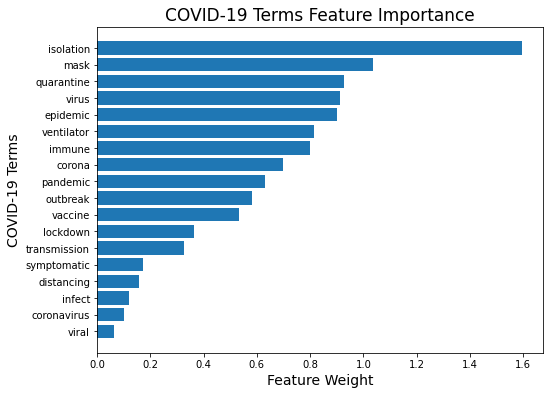

In [344]:
features_names = ['corona', 
                  'virus', 
                  'viral', 
                  'covid', 
                  'pandemic', 
                  'epidemic', 
                  'quarantine', 
                  'lockdown',
                  'distancing',  
                  'infect', 
                  'ventilator', 
                  'mask', 
                  'symptomatic', 
                  'immune', 
                  'transmission', 
                  'vaccine',
                  'coronavirus',
                  'covid-19',
                  'outbreak',
                  'isolation']
plt.figure(figsize=(8,6))
plt.title('COVID-19 Terms Feature Importance', fontsize = 17)
plt.xlabel('Feature Weight', fontsize = 14)
plt.ylabel('COVID-19 Terms', fontsize = 14)
f_importances(classifier_linear.coef_.toarray()[0], features_names)


debt
economy
eviction
income
job
mortgage
rent
salary
wage
0.37768273368621164


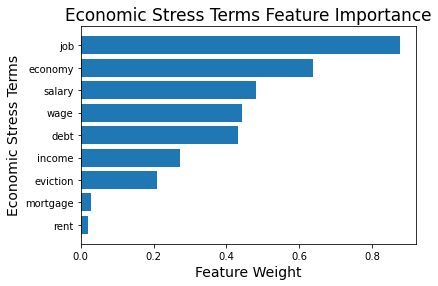

In [345]:
economy_features = ['Unemploy',
                    'rent',
                    'mortgage',
                         'economy',
                         'debt',
                         'salary', 
                          'wage', 
                          'income', 
                          'job', 
                          'eviction',
                         ]
plt.title('Economic Stress Terms Feature Importance', fontsize = 17)
plt.xlabel('Feature Weight', fontsize = 14)
plt.ylabel('Economic Stress Terms', fontsize = 14)
f_importances(classifier_linear.coef_.toarray()[0], economy_features)

abandoned
alone
avoid
isolated
isolation
loneliness
lonely
quarantine
rejected
trapped
1.1156286024055224


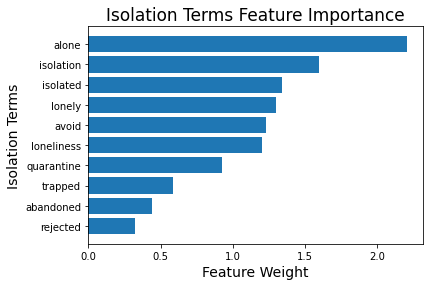

In [346]:
isolation_features = ['alone', 'lonely',  'trapped', 'rejected', 'avoid', 'abandoned', 'isolation', 'loneliness',  'isolated', 'quarantine']

plt.title('Isolation Terms Feature Importance', fontsize = 17)
plt.xlabel('Feature Weight', fontsize = 14)
plt.ylabel('Isolation Terms', fontsize = 14)
f_importances(classifier_linear.coef_.toarray()[0], isolation_features)

abuse
divorce
domestic
fight
hit
slap
strike
violence
yelling
0.31425363961896013


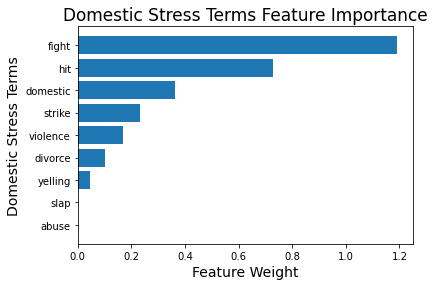

In [347]:
domestic_stress_features = ['divorce', 'abuse', 'yelling',  'fight', 'slap', 'hit', 'strike', 'domestic', 'violence']
plt.title('Domestic Stress Terms Feature Importance', fontsize = 17)
plt.xlabel('Feature Weight', fontsize = 14)
plt.ylabel('Domestic Stress Terms', fontsize = 14)
f_importances(classifier_linear.coef_.toarray()[0], domestic_stress_features)

burden
die
hang
hopeless
hurt
kill
morbid
shoot
suicidal
suicide
0.8571300479192192


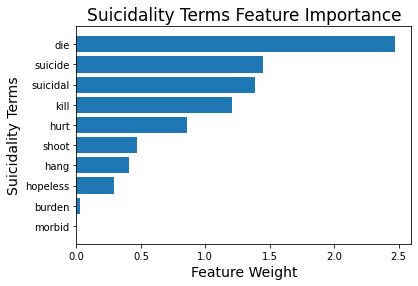

In [348]:
suicidality_features = [ 'hopeless', 'suicide', 'shoot', 'kill', 'suicidal', 'morbid', 'hurt', 'burden', 'hang', 'die']
plt.title('Suicidality Terms Feature Importance', fontsize = 17)
plt.xlabel('Feature Weight', fontsize = 14)
plt.ylabel('Suicidality Terms', fontsize = 14)
f_importances(classifier_linear.coef_.toarray()[0], suicidality_features)

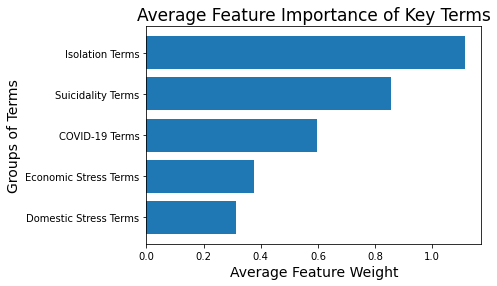

In [7]:
average_dict = {'Suicidality Terms': 0.8571300479192192, 'Domestic Stress Terms': 0.31425363961896013, 'Isolation Terms': 1.1156286024055224, 'COVID-19 Terms': 0.5964368580141453, 'Economic Stress Terms': 0.37768273368621164}

names = average_dict.keys()
imp = average_dict.values()
imp,names = zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)
plt.title('Average Feature Importance of Key Terms', fontsize = 17)
plt.xlabel('Average Feature Weight', fontsize = 14)
plt.ylabel('Groups of Terms', fontsize = 14)
plt.show()

In [196]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC